## System requirement


In [ ]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_match_1 = open('/content/match_1.json')
data = json.load(file_match_1)

In [ ]:
len(data)

574

In [ ]:
df_match=pd.DataFrame(data)
df_match['label'].value_counts()

walk       245
run        209
dribble     42
rest        25
pass        24
tackle      20
shot         6
cross        3
Name: label, dtype: int64

## Distribution of actions for match_1

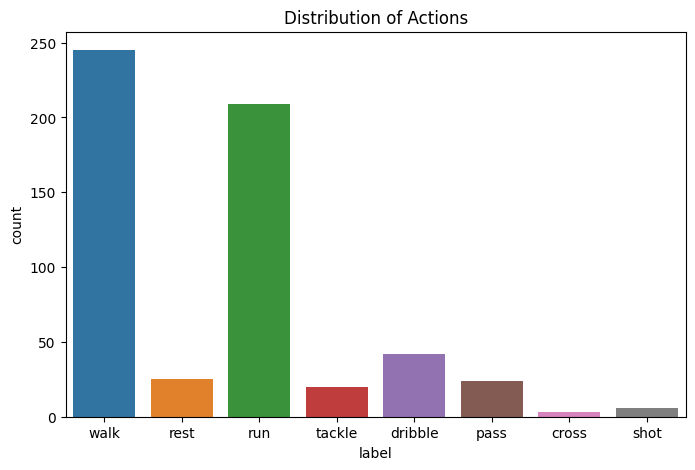

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df_match)
plt.title('Distribution of Actions')
plt.show()

## walk and run are the most repeated actions during the play session,action such as pass,tackle... are considered as occasional action which seems logical for a football match

## Distribution of Sequence Lengths per Action

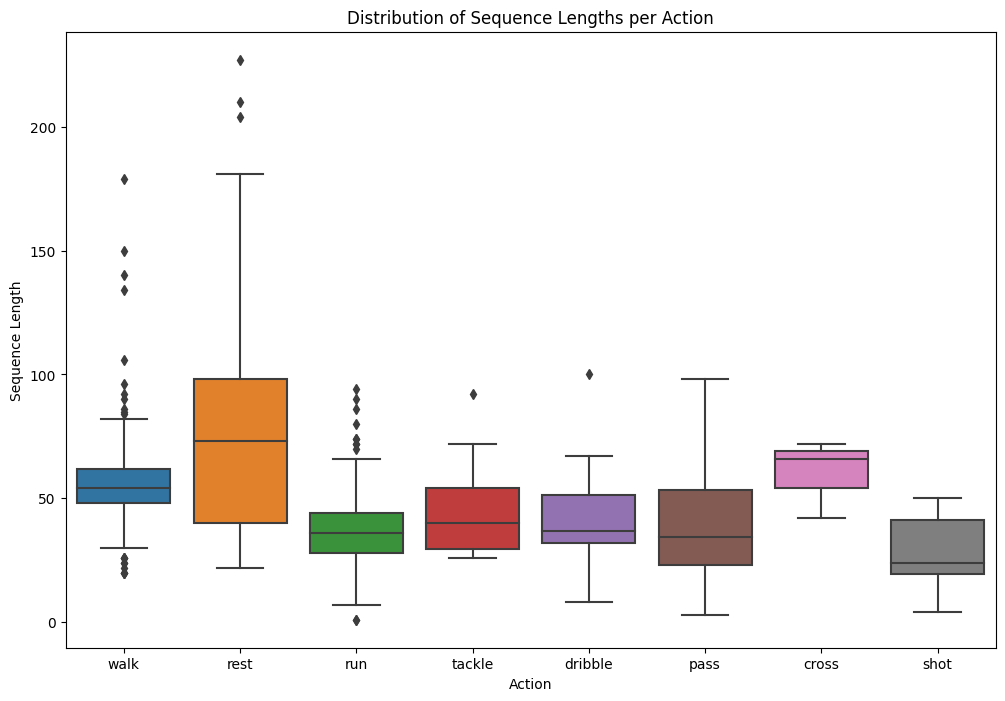

In [ ]:
df_match['sequence_length'] = df_match['norm'].apply(len)
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='sequence_length', data=df_match)
plt.title('Distribution of Sequence Lengths per Action')
plt.xlabel('Action')
plt.ylabel('Sequence Length')
plt.show()


## IF we look at the interquartile range, some actions such as run, cross have last less than the other match actions.
## Plus, thanks to this interquartile method, we can see that these actions have outliers, but regarding my approach and considering that sequence length can vary from one action to another in a real game , i will  not remove these abnormal values.

In [ ]:
df_match['sequence_length'].max()

227

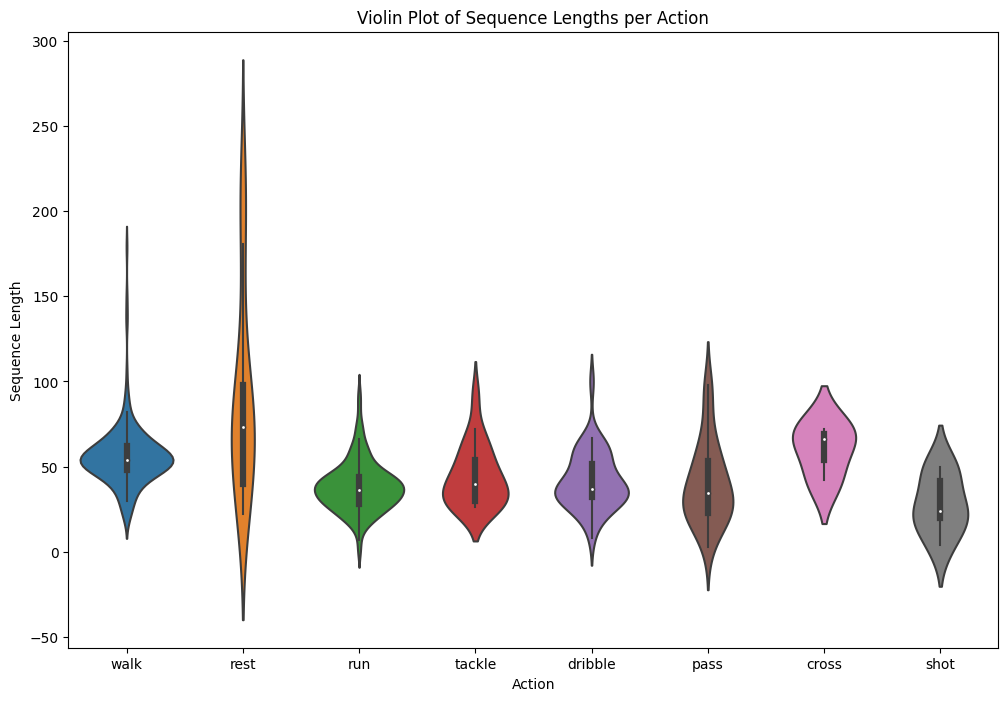

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='label', y='sequence_length', data=df_match)
plt.title('Violin Plot of Sequence Lengths per Action')
plt.xlabel('Action')
plt.ylabel('Sequence Length')
plt.show()

In [ ]:
df_match['avg'] = df_match['norm'].apply(np.mean)
df_match['min']=df_match['norm'].apply(np.min)
df_match['max']=df_match['norm'].apply(np.max)
df_match



,label,norm,sequence_length,avg,min,max
0,walk,"[23.177037336396975, 23.36152528524938, 21.535...",72,24.166958,15.392703,42.738486
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",54,26.026276,15.520896,53.767061
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",68,23.998177,14.484489,42.105998
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",75,22.596573,14.867721,47.934160
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",181,20.378778,17.789805,22.069263
...,...,...,...,...,...,...
569,walk,"[21.245737438782683, 21.938836193196945, 21.24...",85,23.937046,14.659280,113.924672
570,walk,"[20.272347748199333, 21.820302584302983, 21.21...",48,30.876426,13.615492,153.499632
571,run,"[90.21306005395827, 72.12712844635696, 63.5643...",32,59.019320,25.054449,100.630808
572,tackle,"[44.79510251441832, 27.26406867633046, 88.6164...",64,81.714981,3.561442,567.776016


In [ ]:
mean_norm_per_action = df_match.groupby('label')['avg'].mean()
min_norm_per_action = df_match.groupby('label')['min'].min()
max_norm_per_action = df_match.groupby('label')['max'].max()

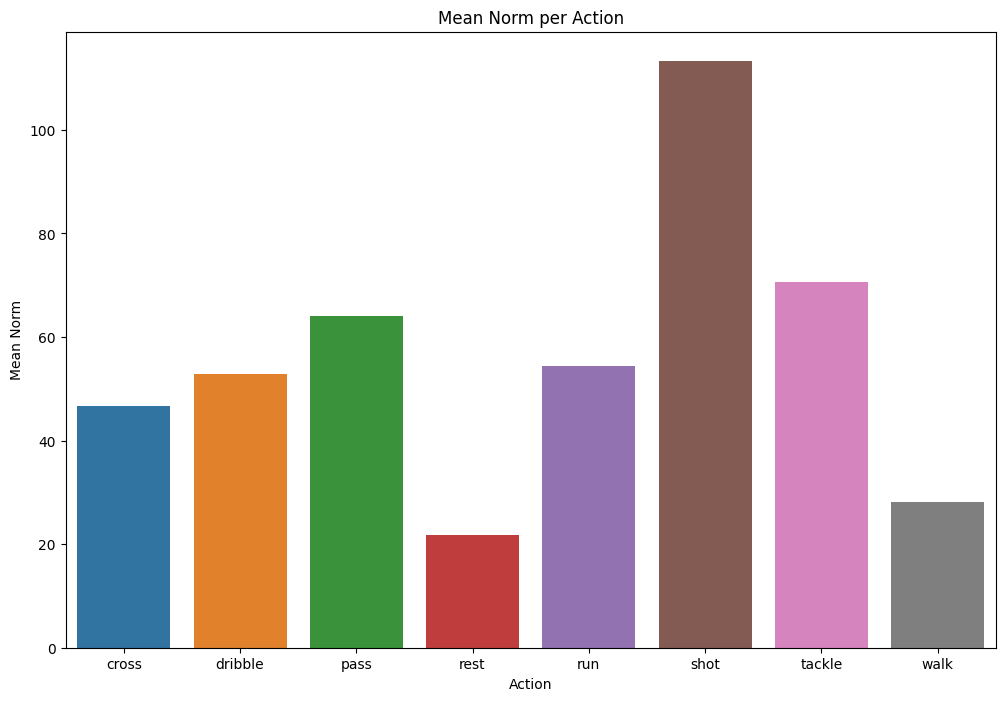

In [ ]:
mean_norm_per_action
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_norm_per_action.index, y=mean_norm_per_action.values)
plt.title('Mean Norm per Action')
plt.xlabel('Action')
plt.ylabel('Mean Norm')
plt.show()

## Walk and rest action are the actions with less mean norm and it is convenient since the player made less effort then less acceleration values during these two kind of actions
## Plus, shot has the higher norm value since the player made a rapid leg movement during shot action

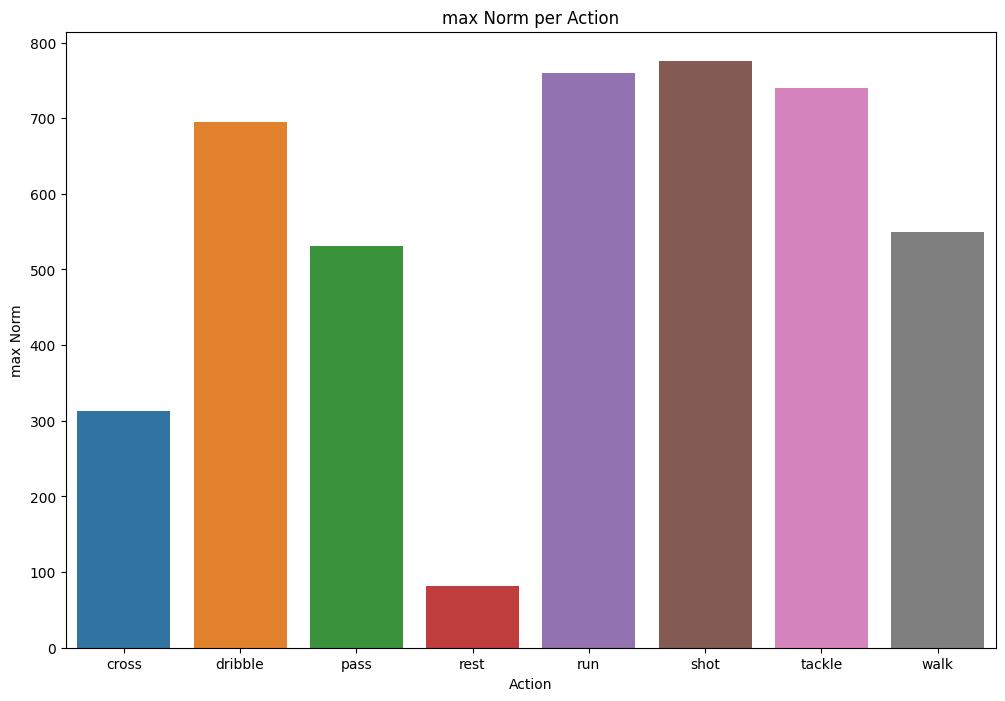

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x=max_norm_per_action.index, y=max_norm_per_action.values)
plt.title('max Norm per Action')
plt.xlabel('Action')
plt.ylabel('max Norm')
plt.show()

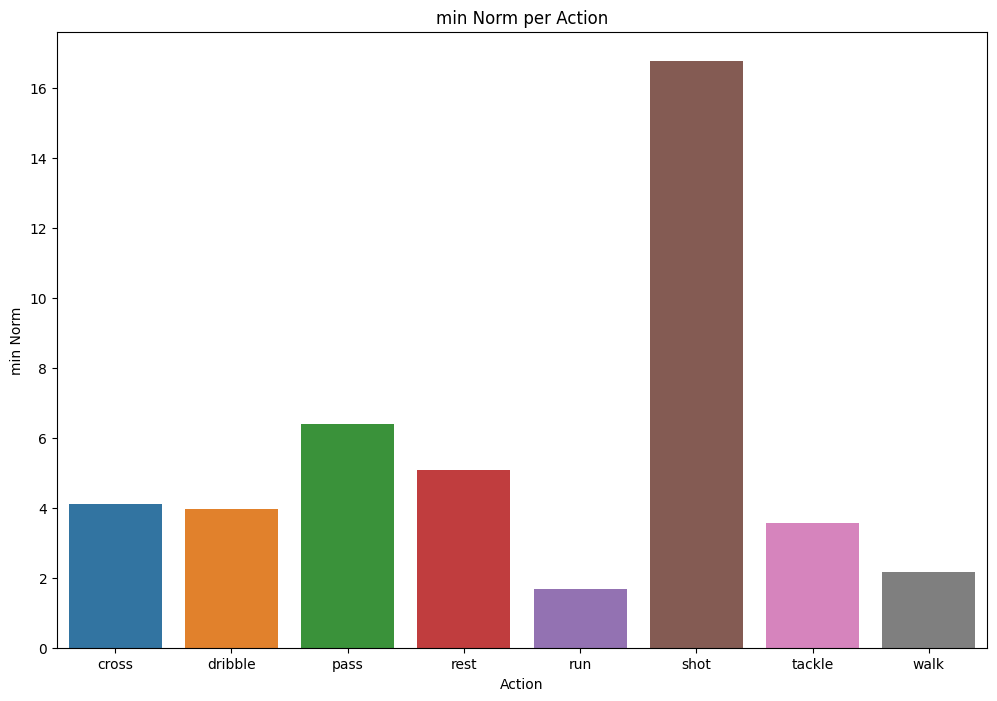

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=min_norm_per_action.index, y=min_norm_per_action.values)
plt.title('min Norm per Action')
plt.xlabel('Action')
plt.ylabel('min Norm')
plt.show()

## overlayed seqeuences for "SHOT" action

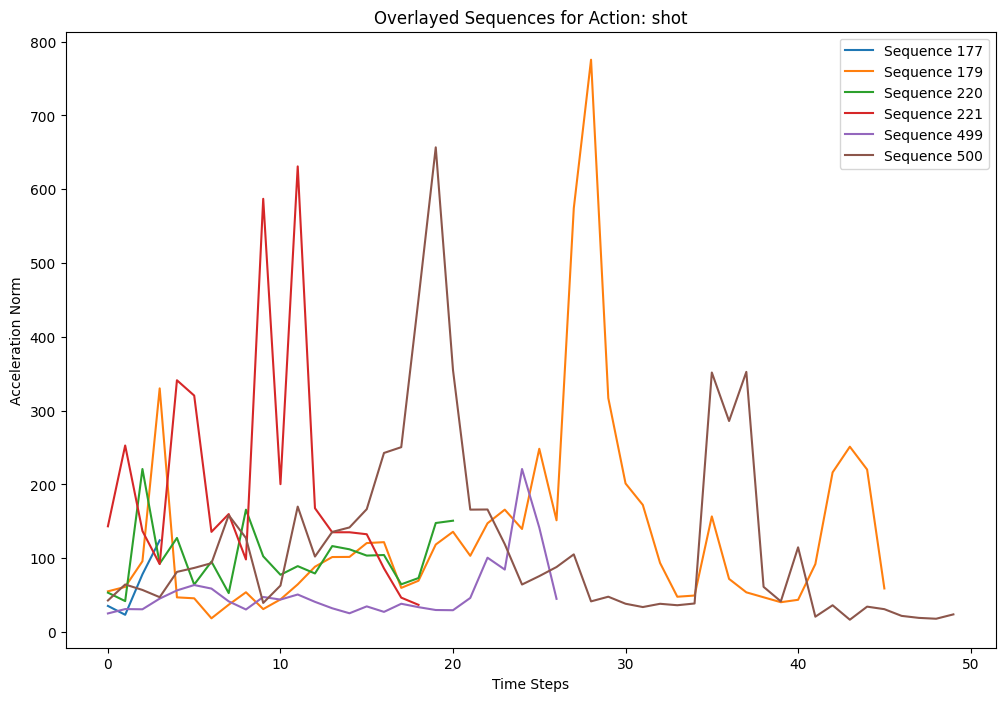

In [ ]:
target= 'shot'
list_before_action=[]
target_data = df_match[df_match['label'] == target]
plt.figure(figsize=(12, 8))
for idx, row in target_data.iterrows():
    plt.plot(row['norm'], label=f'Sequence {idx + 1}')
    list_before_action.append(df_match.loc[idx-1,'label'])
plt.title(f'Overlayed Sequences for Action: {target}')
plt.xlabel('Time Steps')
plt.ylabel('Acceleration Norm')
plt.legend()
plt.show()


In [ ]:
list_before_action

['dribble', 'run', 'dribble', 'shot', 'run', 'shot']

## the "shot" norm values proceded by shot or run action will be often higher because the action is more powerfall than a shot proceded by a dribble for example, which is realistic

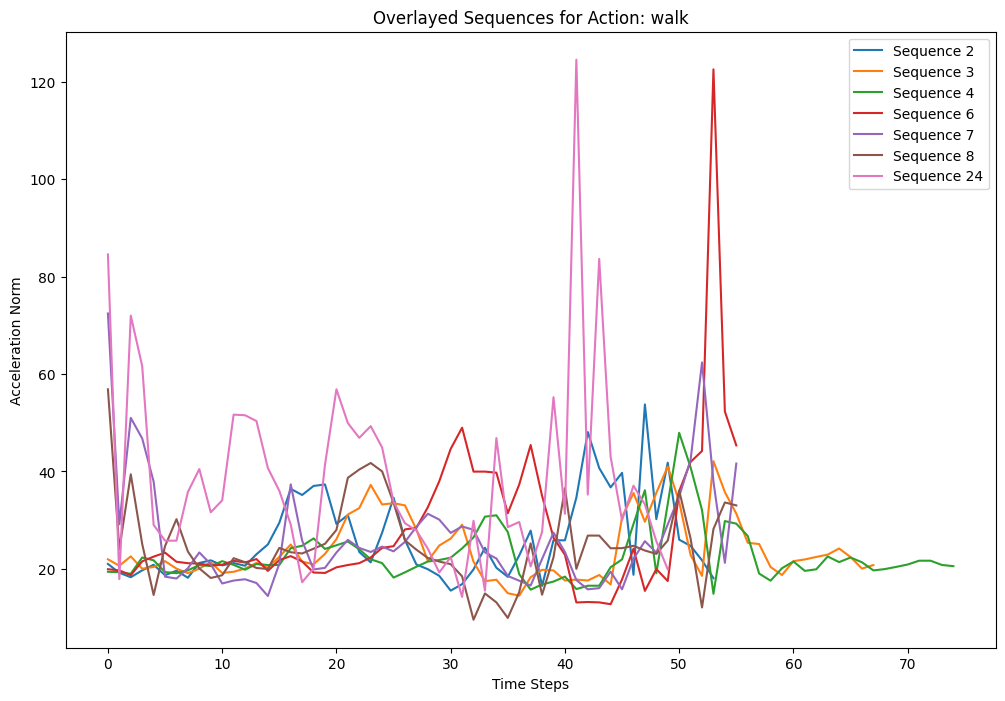

In [ ]:
target= 'walk'
list_before_action_walk=[]
target_data = df_match[df_match['label'] == target]
plt.figure(figsize=(12, 8))
for idx, row in target_data.iterrows():
    if idx!=0:
        plt.plot(row['norm'], label=f'Sequence {idx + 1}')
        list_before_action_walk.append(df_match.loc[idx-1,'label'])
    if idx>10:
      break
plt.title(f'Overlayed Sequences for Action: {target}')
plt.xlabel('Time Steps')
plt.ylabel('Acceleration Norm')
plt.legend()
plt.show()

In [ ]:
list_before_action_walk

['walk', 'walk', 'walk', 'rest', 'walk', 'walk', 'run']

## Here we can observe that the norm values of "walk"a action given a "run" action are higher than its norm values when preceded by "walk" action